In [1]:
# libraries for data analysis 
import pandas as pd
import numpy as np
# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# libraries for nlp task
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
#machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score
# for importive gdrive
from google.colab import drive
drive.mount('/content/drive')
# required for nlp tasks
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
df=pd.read_csv('/content/disaster_tweets.csv')
df.head


<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
# creating new column for storing length of reviews 
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [5]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [6]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

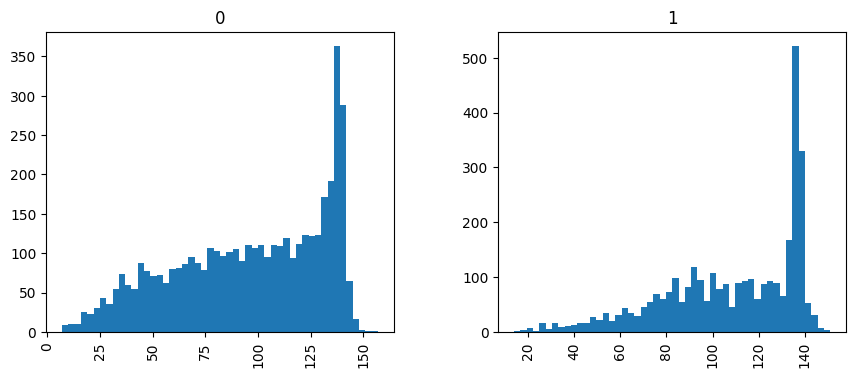

In [7]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

<ipython-input-8-7be53dd32e65>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text']=df_1['text'].apply(remove_stopwords)
<ipython-input-8-7be53dd32e65>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['text']=df_0['text'].apply(remove_stopwords)


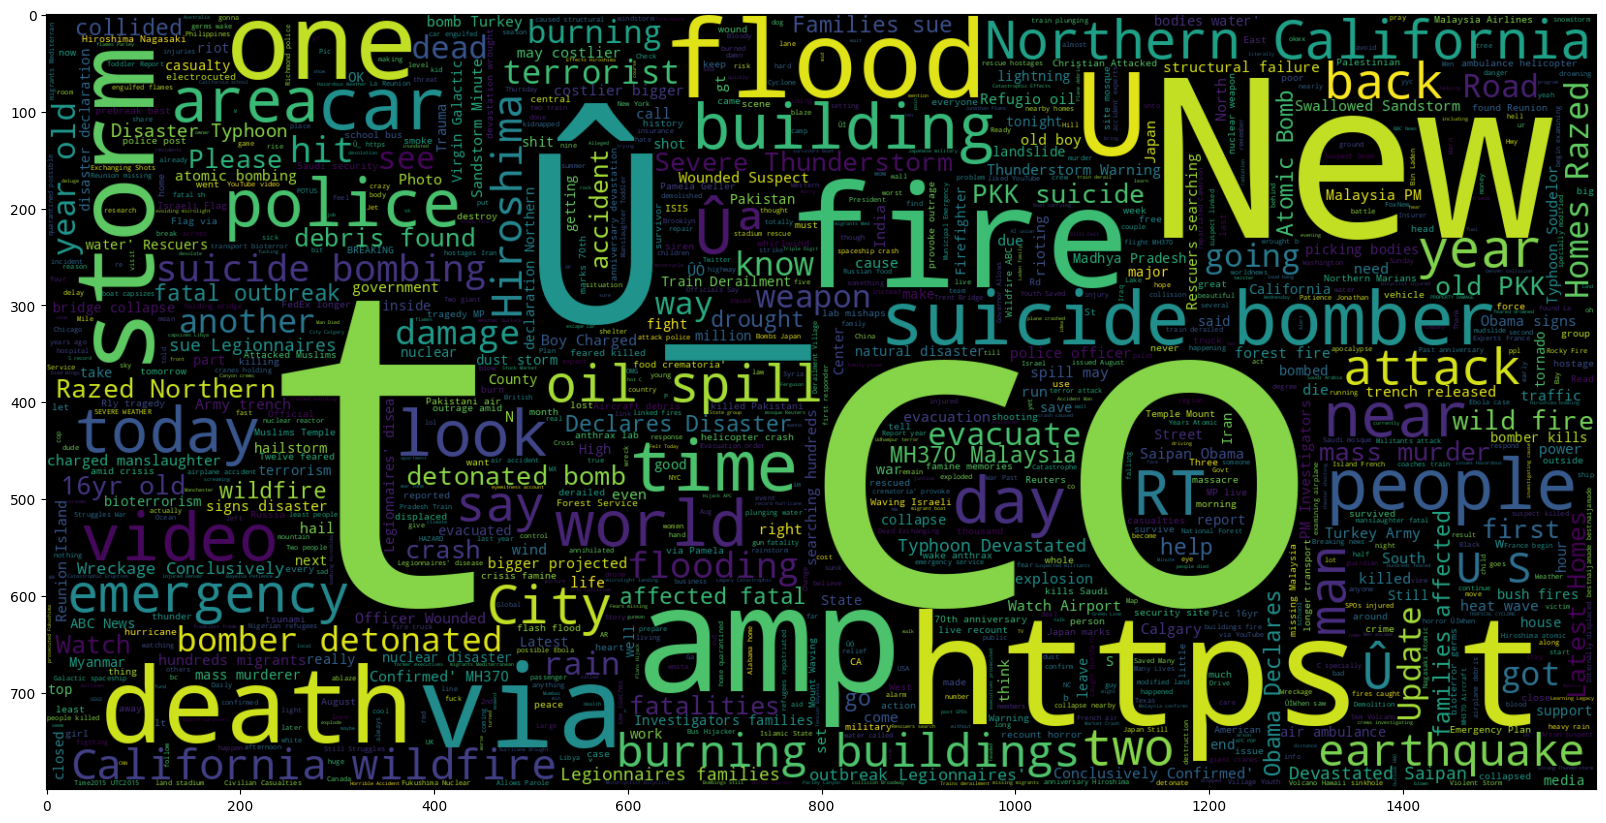

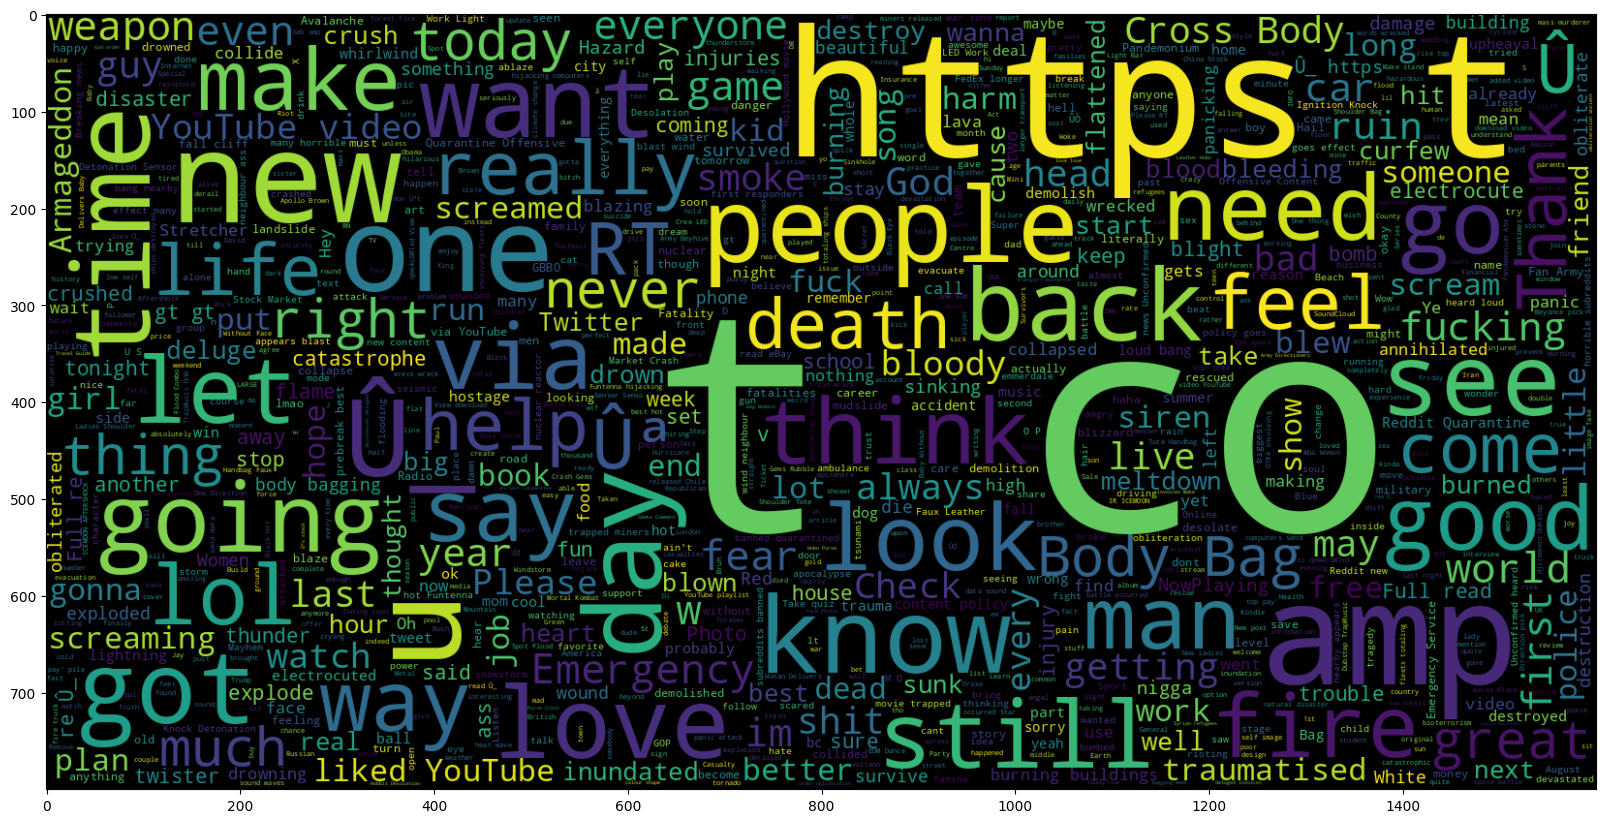

In [8]:
# segregating dataset into disaster and normal tweets dataframe
df_1 = df[df['target']==1]
df_0 = df[df['target']==0]

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from tweets text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1['text']=df_1['text'].apply(remove_stopwords)
df_0['text']=df_0['text'].apply(remove_stopwords)

# plotting disaster tweets wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')

# plotting normal tweets wordcoud

plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

In [9]:
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')
def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt  
#applying cleantweet function on tweet text column
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


In [10]:
y = df.target
X=df.cleaned_tweets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [12]:
# bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# trigrams
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

In [13]:
## Multi nomial Naive Bayes - bigram
mnb_tf_bigram = MultinomialNB()
mnb_tf_bigram .fit(tfidf_train_2, y_train)

# Passive Aggressive Classifier -bigram
pass_tf_bigram = PassiveAggressiveClassifier()
pass_tf_bigram.fit(tfidf_train_2, y_train)

## Multi nomial Naive Bayes - trigram
mnb_tf_trigram = MultinomialNB()
mnb_tf_trigram .fit(tfidf_train_3, y_train)

# Passive Aggressive Classifier -trigram
pass_tf_trigram = PassiveAggressiveClassifier()
pass_tf_trigram.fit(tfidf_train_3, y_train)

PassiveAggressiveClassifier()

In [14]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier_2 = SVC()  
classifier_2.fit(tfidf_train_2, y_train) 


classifier_3 = SVC()  
classifier_3.fit(tfidf_train_3, y_train)

SVC()

In [15]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_passtf2 = cross_val_score(estimator = pass_tf_bigram, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_mnb3 = cross_val_score(estimator = mnb_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

acc_passtf3 = cross_val_score(estimator = pass_tf_trigram, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

acc_class_2= cross_val_score(estimator = classifier_2, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)

acc_class_3 = cross_val_score(estimator = classifier_3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)

# compare the average 10-fold cross-validation accuracy
crossdict = {        
                'MNB-Bigram': acc_mnb2.mean(),
               
                'PassiveAggressive-Bigram':acc_passtf2.mean(),
               
                'MNB-Trigram': acc_mnb3.mean(), 
               
                'PassiveAggressive-Trigram': acc_passtf3.mean(),
                'SVM-Bigram': acc_class_2.mean(),
                'SVM-Trigram':acc_class_3.mean() }

cross_df = pd.DataFrame(crossdict.items(), columns=['Model', 'Cross-val accuracy'])
cross_df = cross_df.sort_values(by=['Cross-val accuracy'], ascending=False)
cross_df

,Model,Cross-val accuracy
0,MNB-Bigram,0.792282
3,PassiveAggressive-Trigram,0.791297
1,PassiveAggressive-Bigram,0.786700
2,MNB-Trigram,0.784565
4,SVM-Bigram,0.766831
5,SVM-Trigram,0.741708


In [16]:
pred_mnb2 = mnb_tf_bigram.predict(tfidf_test_2)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)
roc=roc_auc_score(y_test, pred_mnb2)

model_results =pd.DataFrame([['Multinomial Naive Bayes-Bigram',acc, prec,rec,f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Sensitivity,F1 Score,ROC
0,Multinomial Naive Bayes-Bigram,0.800394,0.858607,0.640673,0.7338,0.780636


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.7338


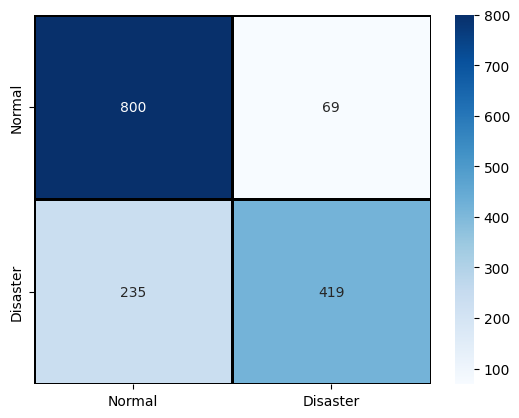

In [17]:
pred_mnb2 = mnb_tf_bigram.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

<Axes: >

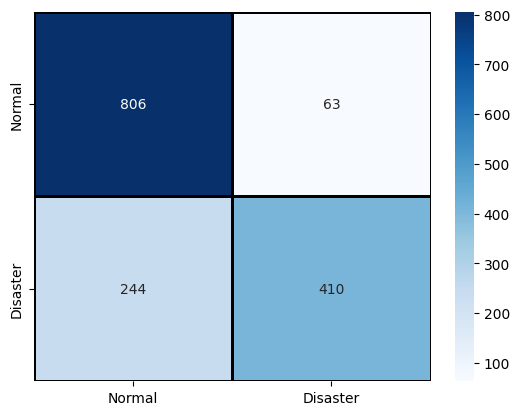

In [18]:
pred_mnb3 = mnb_tf_trigram.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal','Disaster'])

<ipython-input-19-074b5d205330>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = model_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800
1,Passive Aggressive Classifier - TFIDF-Bigram,0.782666,0.745068,0.750765,0.920598,0.747906


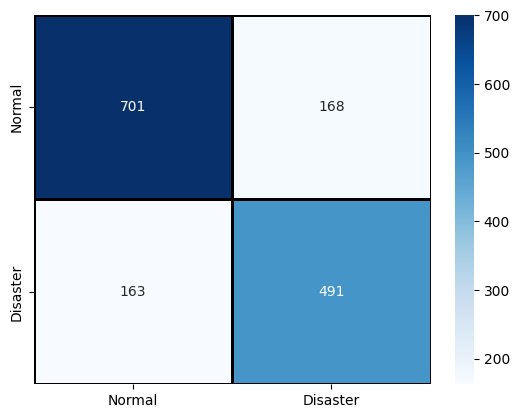

In [19]:
pred_pass2 = pass_tf_bigram.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_pass2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass2)
prec = precision_score(y_test, pred_pass2)
rec = recall_score(y_test, pred_pass2)
f1 = f1_score(y_test, pred_pass2)

results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
results = model_results.append(results, ignore_index = True)
results

<Axes: >

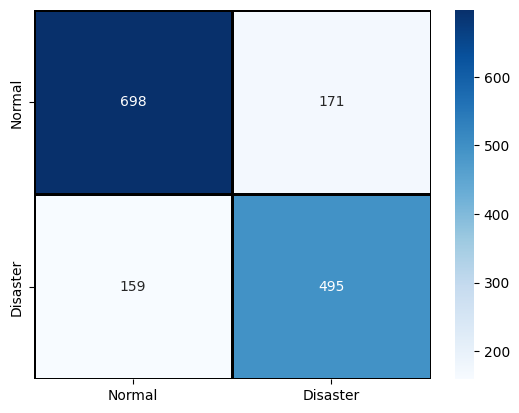

In [20]:
pred_pass3 = pass_tf_trigram.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_pass3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

<Axes: >

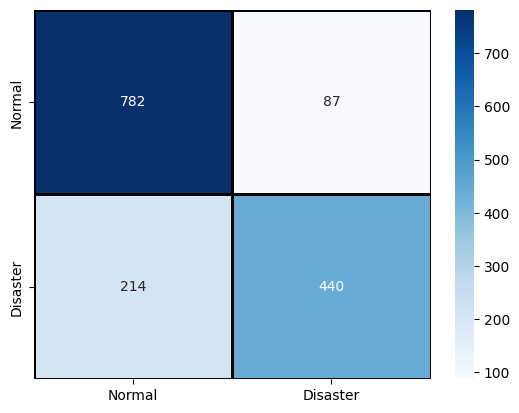

In [21]:
pred_classi = classifier_2.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_classi)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal','Disaster'])

<Axes: >

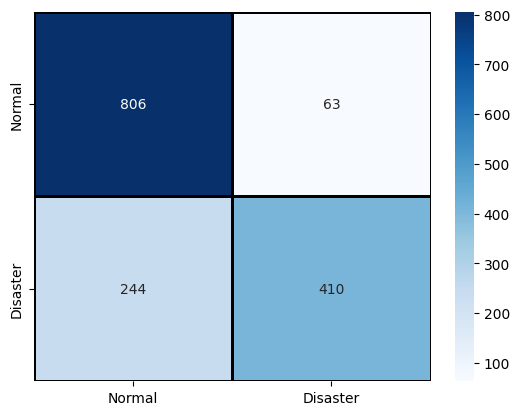

In [22]:
pred_classi_3 = classifier_3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal','Disaster'])

In [23]:
y_pred_passtf2 = pass_tf_bigram.predict(tfidf_test_2)
y_pred_mnb3 = mnb_tf_trigram.predict(tfidf_test_3)
y_pred_passtf3 =pass_tf_trigram.predict(tfidf_test_3)
y_pred_class2 = classifier_2.predict(tfidf_test_2)
y_pred_class3 = classifier_3.predict(tfidf_test_3)



models = {        
                'PassiveAggressive-Bigram':y_pred_passtf2,
               
                'MNB-Trigram': y_pred_mnb3, 
               
                'PassiveAggressive-Trigram': y_pred_passtf3,
          
                'SVM -Bigram': y_pred_class2,
          
                'SVM -Trigram': y_pred_class3 }

models = pd.DataFrame(models) 
 
for column in models:
    
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
   
    results =pd.DataFrame([[column,acc, prec,rec,f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

# function to highlight maximum value of numeric columns
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]

model_results.style.apply(highlight_max)

<ipython-input-23-782121c7d05c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-23-782121c7d05c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-23-782121c7d05c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-23-782121c7d05c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
<ipython-input-23-782121c7d05c>:33: FutureWarnin

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800,nan
1,PassiveAggressive-Bigram,0.782666,0.745068,0.750765,nan,0.747906,0.778719
2,MNB-Trigram,0.798424,0.866808,0.626911,nan,0.727595,0.777207
3,PassiveAggressive-Trigram,0.783322,0.743243,0.756881,nan,0.750000,0.780051
4,SVM -Bigram,0.802364,0.834915,0.672783,nan,0.745131,0.786334
5,SVM -Trigram,0.794485,0.827255,0.659021,nan,0.733617,0.777727


In [24]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
   
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [25]:
most_informative_feature_for_binary_classification(tfidf_vectorizer_3,pass_tf_trigram, n=10)

0 -2.2319332799698013 let
0 -1.937603255574253 suicide bomb
0 -1.8462441527673998 love
0 -1.8406383493825056 bag
0 -1.8162974139815167 hrqcjdovjz
0 -1.8162974139815167 http hrqcjdovjz
0 -1.8162974139815167 mishap http hrqcjdovjz
0 -1.7695467467048644 flattened
0 -1.7563257242335928 new
0 -1.7313026070086575 dianneg

1 4.078076312806299 http
1 3.983155391591852 hiroshima
1 3.533021704457749 california
1 2.975365516638335 building
1 2.941483184968929 train
1 2.9014925095956263 forest
1 2.89019748489557 wildfire
1 2.8675978506388438 bombing
1 2.7320534184783756 flood
1 2.5692819272635528 temecafreeman gm pray


In [26]:
X = df["text"] # indpendent feature
y = df["target"] # dependent feature
y = np.array(y) # converting to array
#Calculating the number of unique words present in the disaster tweets.

def unq_words(sentence):
  unq_words_list = []
  for sent in sentence:
    for word in sent.split():
      if word.lower() not in unq_words_list:
        unq_words_list.append(word.lower())
      else:
        pass
  return unq_words_list
unique_words = unq_words(X)
print("Total unique words present :",len(unique_words))
#Total unique words present : 27983

Total unique words present : 27983


In [27]:
wl = WordNetLemmatizer()
def preprocessing(text):
  tweets = []
  for sentence in text:
    '''sentence = sentence.lower() # converting the words to lower case
    sentence =  url_remover(sentence) # removing the url from the sentence
    sentence = re.sub(r'@w+',  '', sentence).strip() # removing the words starts with "@"
    sentence = re.sub("[^a-zA-Z0-9 ']", "", sentence) # removing symbols'''
    #sentence = sentence.split()
    sentence1 = [wl.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))] #lemmatization and stopwrds removal from tweets
    sentence1 = " ".join(sentence1)
    tweets.append(sentence1)
  return tweets
tweets = preprocessing(X)

In [28]:
from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [29]:
VOC_SIZE = 30000
onehot_vector = [one_hot(words, VOC_SIZE) for words in tweets]
onehot_vector[110:120]

[[29680,
  29406,
  13921,
  19595,
  29680,
  310,
  5911,
  6715,
  5911,
  9460,
  23466,
  29680,
  19595,
  29680,
  123,
  9460,
  5911,
  29680,
  23466,
  19595,
  13015,
  19595,
  29680,
  19595,
  123,
  29406,
  19595,
  29680,
  17445,
  23466,
  123,
  310,
  23466,
  3396,
  13015,
  23466,
  16306,
  3396,
  23466,
  29406,
  13015,
  123,
  8938,
  16306],
 [6715,
  29680,
  310,
  23466,
  19595,
  19595,
  23466,
  123,
  310,
  9460,
  9460,
  13921,
  19595,
  19595,
  3396,
  29406,
  23466,
  23466,
  8740,
  3396,
  23466,
  29406,
  13015,
  123,
  8938,
  1319,
  123],
 [8740,
  3396,
  23466,
  29406,
  13015,
  123,
  8938,
  13921,
  13015,
  23466,
  23466,
  29406,
  29406,
  3396,
  19595,
  29680,
  17445,
  23466,
  29406,
  9460,
  9460,
  23466,
  29406,
  123,
  23466,
  29406,
  21345,
  16306,
  19784,
  23466,
  23466,
  19784,
  23466,
  29406,
  17445,
  23466,
  23466,
  19595,
  19595,
  27027,
  21345,
  6715,
  123,
  9460,
  8740,
  21345,

In [30]:
word_length = []
for i in onehot_vector:
  word_length.append(len(i))
len(word_length)#7613
#Finding the maximum word length

max(word_length) #25
#As you know that length of each words are of different size, this will cause while training the model, since model requires data of same size. So we are performing zero padding in order to make equal length sequences.

SENTENCE_LENGTH = 15
embedded_docs = pad_sequences(onehot_vector, padding="post", maxlen=SENTENCE_LENGTH)
embedded_docs

array([[23466, 29962,  8740, ...,   310,  9460,  9460],
       [ 3396, 29406, 23466, ...,  8938,   123, 19595],
       [ 5911,  9460,   123, ..., 23466,   123, 23466],
       ...,
       [19784,  9460,   123, ..., 23466, 17445, 22110],
       [ 9460,  3396, 23466, ...,   310, 29406, 23466],
       [  123, 19595, 23466, ...,  8938, 15143,   683]], dtype=int32)

In [31]:
def model():
  VECTOR_FEATURES = 32
  lstm_model = Sequential()
  lstm_model.add(Embedding(VOC_SIZE,
                      VECTOR_FEATURES,
                      input_length=SENTENCE_LENGTH))
  lstm_model.add(LSTM(100, return_sequences = True))
  lstm_model.add(GlobalMaxPool1D())
  lstm_model.add(BatchNormalization())
  lstm_model.add(Dropout(0.5))
  lstm_model.add(Dense(10, activation="relu"))
  lstm_model.add(Dropout(0.25))
  lstm_model.add(Dense(1, activation = "sigmoid"))
  return lstm_model

In [32]:
lstm_model = model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            960000    
                                                                 
 lstm (LSTM)                 (None, 15, 100)           53200     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [37]:
ory = lstm_model.fit(embedded_docs, y, epochs=8, batch_size=32)

Epoch 1/8
238/238 [==============================] - 8s 34ms/step - loss: 0.6489 - accuracy: 0.6191
Epoch 2/8
238/238 [==============================] - 8s 34ms/step - loss: 0.6476 - accuracy: 0.6178
Epoch 3/8
238/238 [==============================] - 7s 31ms/step - loss: 0.6472 - accuracy: 0.6132
Epoch 4/8
238/238 [==============================] - 8s 35ms/step - loss: 0.6466 - accuracy: 0.6210
Epoch 5/8
238/238 [==============================] - 7s 29ms/step - loss: 0.6445 - accuracy: 0.6234
Epoch 6/8
238/238 [==============================] - 8s 35ms/step - loss: 0.6442 - accuracy: 0.6267
Epoch 7/8
238/238 [==============================] - 7s 29ms/step - loss: 0.6422 - accuracy: 0.6268
Epoch 8/8
238/238 [==============================] - 8s 35ms/step - loss: 0.6409 - accuracy: 0.6298


Text(0.5, 1.0, 'Accuracy')

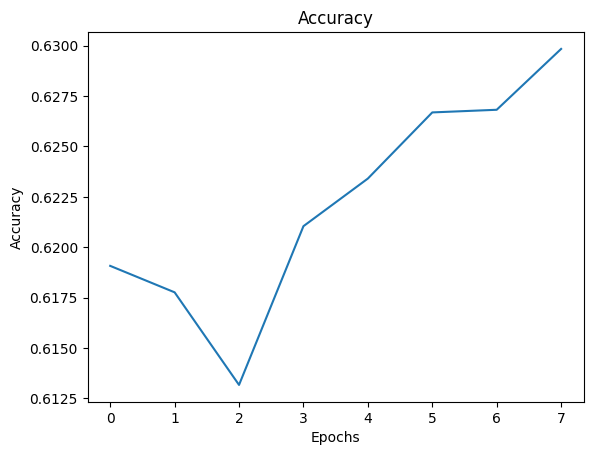

In [38]:
plt.plot(ory.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

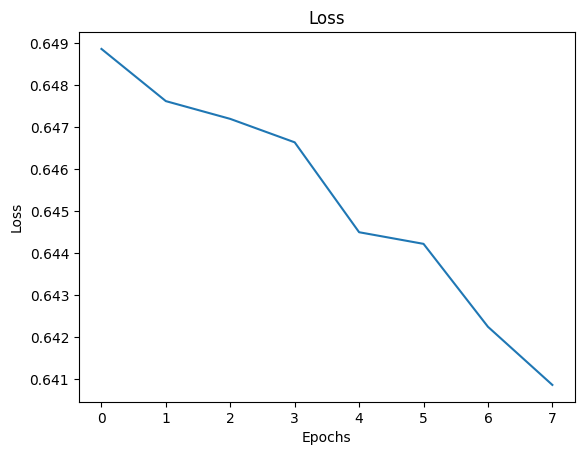

In [39]:
plt.plot(ory.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")

In [40]:
sentences = [
  "Just happened a terrible car crash",
    "Heard about #earthquake is different cities, stay safe everyone.",
    "No I don't like cold!",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]

tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf_trigram.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()

text: Just happened a terrible car crash 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: No I don't like cold! 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet

